In [2]:
import numpy as np
from dataset import generate_synth_dataset
from sklearn.model_selection import train_test_split
from model import LogRegCCD


In [3]:
p = 0.5   
n = 200  
d = 10    
g = 0.5   

dataset = generate_synth_dataset(p, n, d, g)
print(dataset.head())

         f1        f2        f3        f4        f5        f6        f7  \
0 -0.841014 -0.242364 -1.229975 -0.626877  0.399128  1.083171  0.436169   
1 -0.835467 -0.724842 -0.665822  0.044414  2.497236  1.210884  1.359240   
2  0.285385  0.431615  0.495628  0.809895  0.179773 -1.030924 -0.915455   
3  0.878599  1.600562 -1.009820  0.294885 -0.149138  0.412091  0.440738   
4  2.645511  0.997618  0.723622 -0.046693 -0.113175  0.817367 -0.100919   

         f8        f9       f10  Y  
0  0.116742 -0.264855 -0.419607  0  
1  0.902478 -0.812180  0.037789  0  
2 -0.538810 -1.520814 -1.616116  1  
3  1.103785  0.293876  0.666772  0  
4 -0.123463  1.147508 -0.648024  0  


In [4]:
feature_cols =['f1','f2','f3','f4','f5','f6','f7','f8', 'f9','f10']
y = dataset.Y
X = dataset[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


0.0


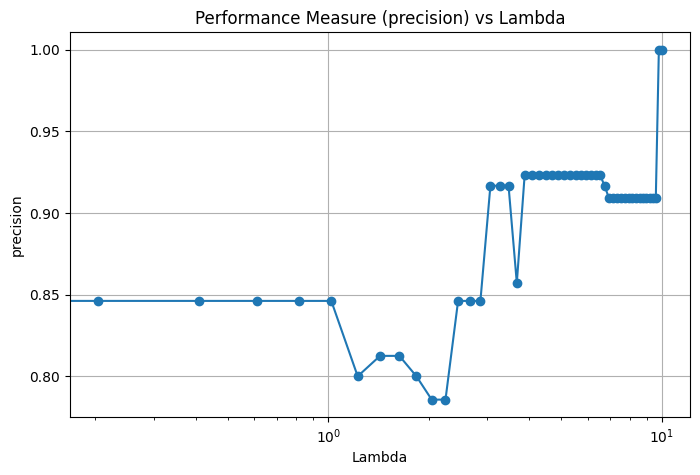

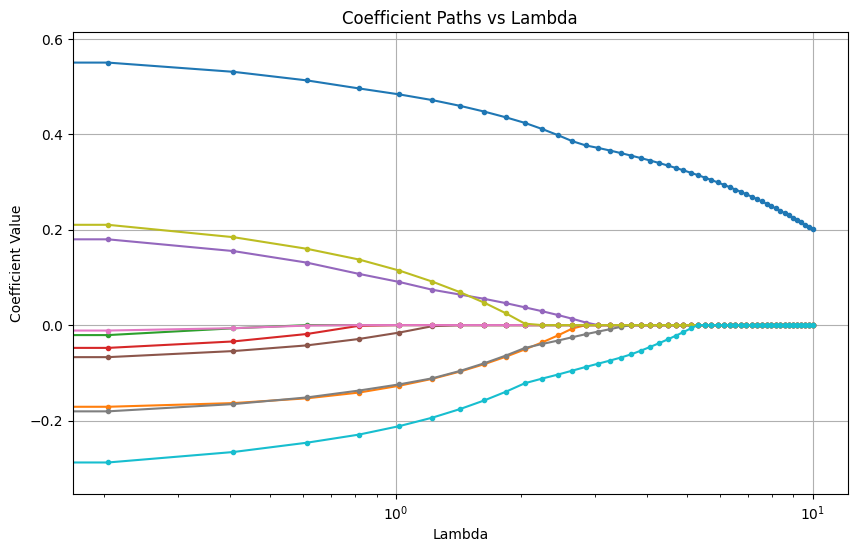

In [12]:
lambdas = np.linspace(
    10, 0, 50
)  # explicitly 50 lambda values from 0.1 to 0.001
model = LogRegCCD(lambdas=lambdas)
model.fit(X_train, y_train, alpha=1)
model.validate(X_val, y_val)
print(model.best_lambda_)

model.plot(X_val, y_val, measure="precision")
model.plot_coefficients()

0.0


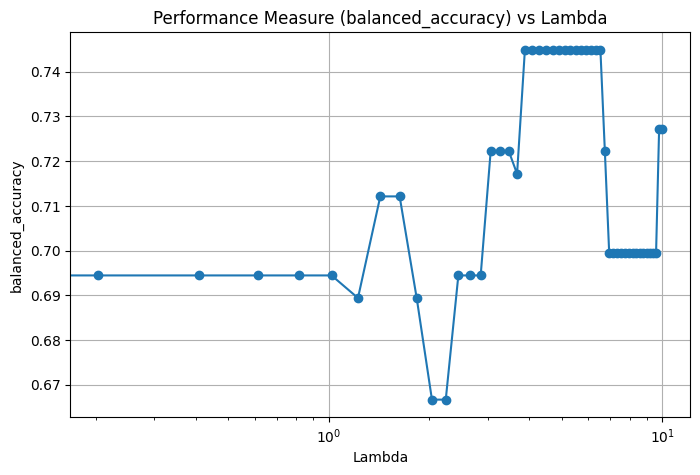

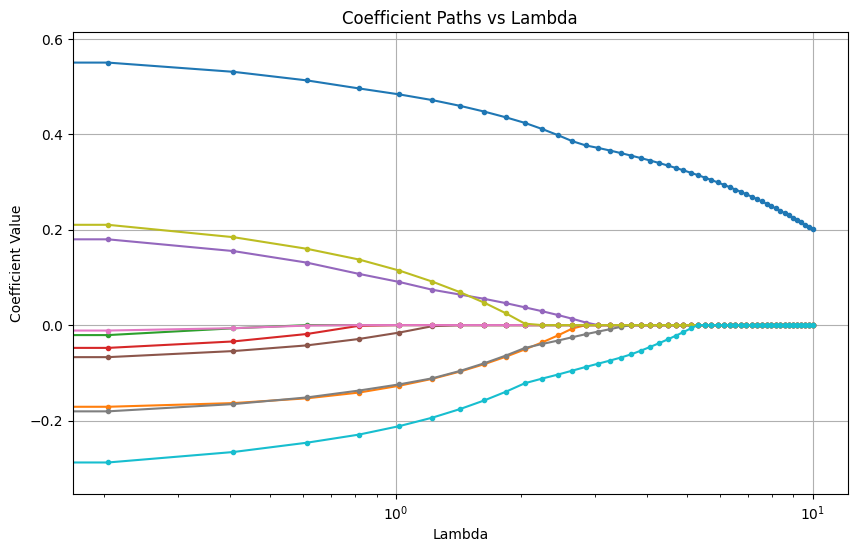

In [14]:
lambdas = np.linspace(10, 0, 50)  # explicitly 100 lambda values from 0.001 to 0.000001
model_diff_params = LogRegCCD(lambdas=lambdas)
model_diff_params.fit(X_train, y_train, alpha=1)
model_diff_params.validate(X_val, y_val)
print(model.best_lambda_)
model_diff_params.plot(X_val, y_val, measure="balanced_accuracy")
model_diff_params.plot_coefficients()